#Proceso de generación de valor por extración de datos


Utilizare el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y permitirá hacer análisis de ventas, categorías etc.





In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from google.colab import drive

# Importar Datos e Identificar variables a limpiar

In [161]:
#Dentro de content creo el archivo superstore con todos los archivos csv
path = r'/content/superstore'
files = os.listdir(path)
SUPSTORE = pd.DataFrame()
for file in files:
  df_temp = pd.read_csv(path + "/"+ file,index_col=0, sep=',', encoding='latin-1')
  df_temp['file_name'] = file
  SUPSTORE = pd.concat([SUPSTORE, df_temp], ignore_index=True)

In [162]:
#SUPSTORE.head() #los 5 primeros valores
#SUPSTORE.tail()#los 5 ultimos valores
#SUPSTORE.describe()
SUPSTORE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        61550 non-null  object 
 1   Order Date      61550 non-null  object 
 2   Ship Date       61550 non-null  object 
 3   Ship Mode       61550 non-null  object 
 4   Customer ID     61550 non-null  object 
 5   Customer Name   61550 non-null  object 
 6   Segment         61550 non-null  object 
 7   City            61550 non-null  object 
 8   State           61550 non-null  object 
 9   Country         61550 non-null  object 
 10  Postal Code     11899 non-null  float64
 11  Market          61550 non-null  object 
 12  Region          61550 non-null  object 
 13  Product ID      61550 non-null  object 
 14  Category        61550 non-null  object 
 15  Sub-Category    61550 non-null  object 
 16  Product Name    61550 non-null  object 
 17  Sales           61550 non-null 

In [163]:
#No hay valores vacios solo en postal code pero no importa porque no es una dato importante asi que elimare los nulls
# convertire los postal code a tipo texto pq no es un valor de agregacion
SUPSTORE.isna().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       49651
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
file_name             0
dtype: int64

# Limpieza de Datos

In [164]:
#converti la columna postal code en str
SUPSTORE['Postal Code'] = SUPSTORE['Postal Code'].astype(str)
#Quitar los duplicados
SUPSTORE = SUPSTORE.drop_duplicates(subset=['Order ID'])
#Convertir order date y ship date a tipo date time
SUPSTORE['Order Date'] = pd.to_datetime(SUPSTORE['Order Date'])
SUPSTORE['Ship Date'] = pd.to_datetime(SUPSTORE['Ship Date'])
#Extraigo dia, mes, año de order date y shipe date
SUPSTORE['Year-Order'] = SUPSTORE['Order Date'].dt.year
SUPSTORE['Month-Order'] = SUPSTORE['Order Date'].dt.month
SUPSTORE['Day-Order'] = SUPSTORE['Order Date'].dt.day

SUPSTORE['Year-Ship'] = SUPSTORE['Ship Date'].dt.year
SUPSTORE['Month-Ship'] = SUPSTORE['Ship Date'].dt.month
SUPSTORE['Day-Ship'] = SUPSTORE['Ship Date'].dt.day

<ipython-input-164-44f6043a133f>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  SUPSTORE['Order Date'] = pd.to_datetime(SUPSTORE['Order Date'])
<ipython-input-164-44f6043a133f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUPSTORE['Order Date'] = pd.to_datetime(SUPSTORE['Order Date'])
<ipython-input-164-44f6043a133f>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  SUPSTORE['Ship Date'] = pd.to_datetime(SUPSTORE['Ship Date'])


# Creación de nueva base de datos en Google Drive

In [165]:
SUPSTORE.to_csv('superstore.csv')
from google.colab import files
files.download('superstore.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Explorando datos

Conectar a la nueva base de datos

In [166]:
spst = pd.read_csv('superstore.csv', sep=',')

# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



In [167]:
spst.head()
spst.drop('Unnamed: 0', axis=1, inplace=True)
spst['Order Date'] = pd.to_datetime(spst['Order Date'])
#spst.info()

# Se va a mostrar el mejor dia de la semana de ventas para cada categoria


In [168]:
#Se crea un nueva columna para almacenar el dia de la semana con la funcion day_name()
spst['DayOfWeek'] = spst['Order Date'].dt.day_name()

#Se hace la agrupacion de 'Category', 'DayOfWeek' y se calcula el valor maximo de sales

mejor_dia = spst.groupby(['Category', 'DayOfWeek'])['Sales'].max().reset_index()

#Se agrupa por 'Category' y con idxmax() va a encontrar el indice de la fila con el maximo valor de ventas
mejor_dia = mejor_dia.loc[mejor_dia.groupby('Category')['Sales'].idxmax()]

print(mejor_dia)

           Category  DayOfWeek      Sales
6         Furniture  Wednesday   5759.964
13  Office Supplies  Wednesday   9892.740
17       Technology     Sunday  17499.950


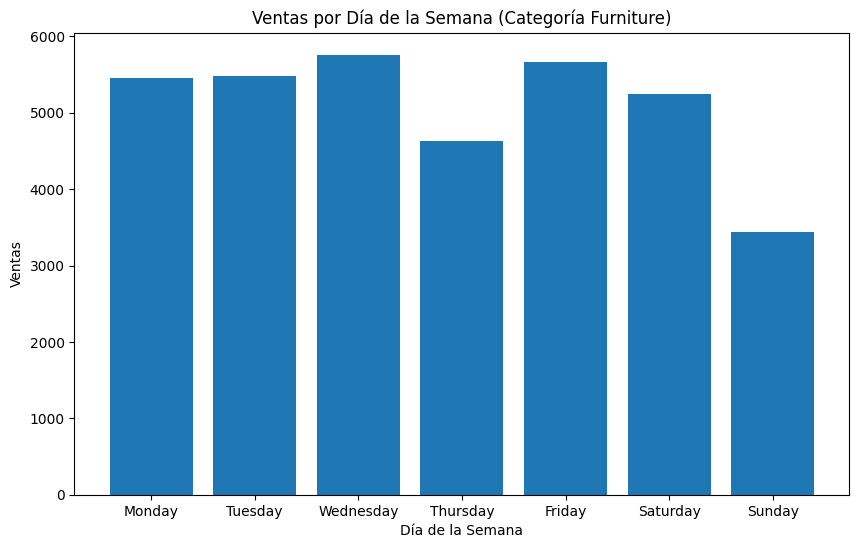

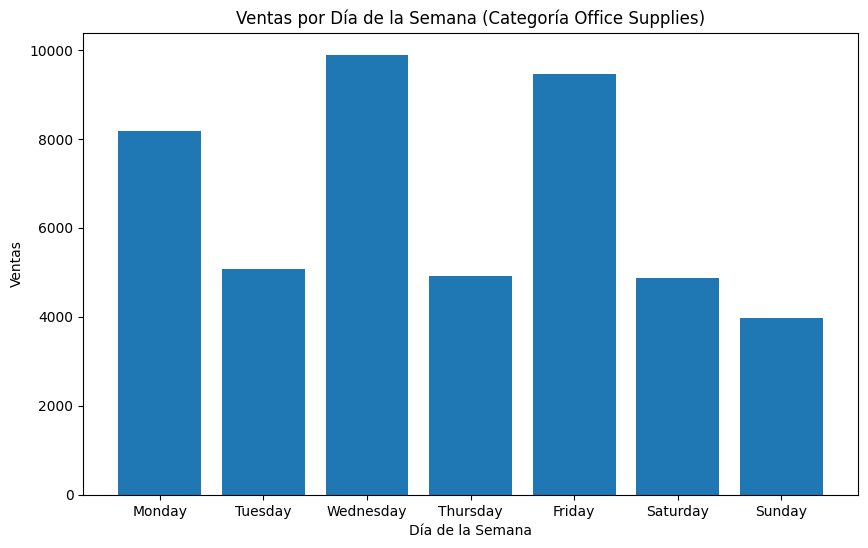

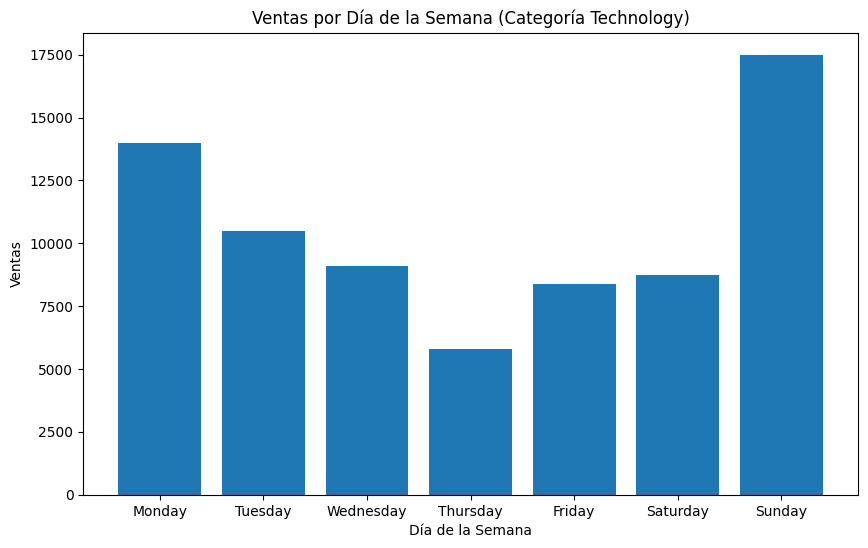

In [169]:
#Ordenar los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#uso cateogrical para ordenas mis WeekOfDay
spst['DayOfWeek'] = pd.Categorical(spst['DayOfWeek'], categories=ordered_days, ordered=True)

#Creo el grafico de barras separado por categorias
for category, data_category in spst.groupby('Category'):
    plt.figure(figsize=(10, 6))
    data_category = data_category.sort_values('DayOfWeek')  # Ordenar por días de la semana
    bars = plt.bar(data_category['DayOfWeek'], data_category['Sales'])
    plt.title(f'Ventas por Día de la Semana (Categoría {category})')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Ventas')
    plt.xticks(rotation=0)
    plt.show()

**Conclusión:** Se encontro que los dias miercoles son los mejores dias de ventas para 'Furniture'y 'Office Supplies' y 'Technology' siendo la categoria de mayor ventas se encontro que los dias domingos son los dias de mayores ventas.
Una ventaja que se puede aprovechar que 'Furniture'y 'Office Supplies' tengan el mismo dia mayores ventas es de promover mas los productos de 'Office Supplies' para los clientes que compran en 'Furniture' los dias miercoles porque los ventas totales en todos los años de 'Office Supplies' son muy bajas comparadas con las otras categorias lo cual puede ayudar a aumentar las ventas en 'Office Supplies'

# Se va mostrar un promedio de ventas por AÑO-MES para cada categoria

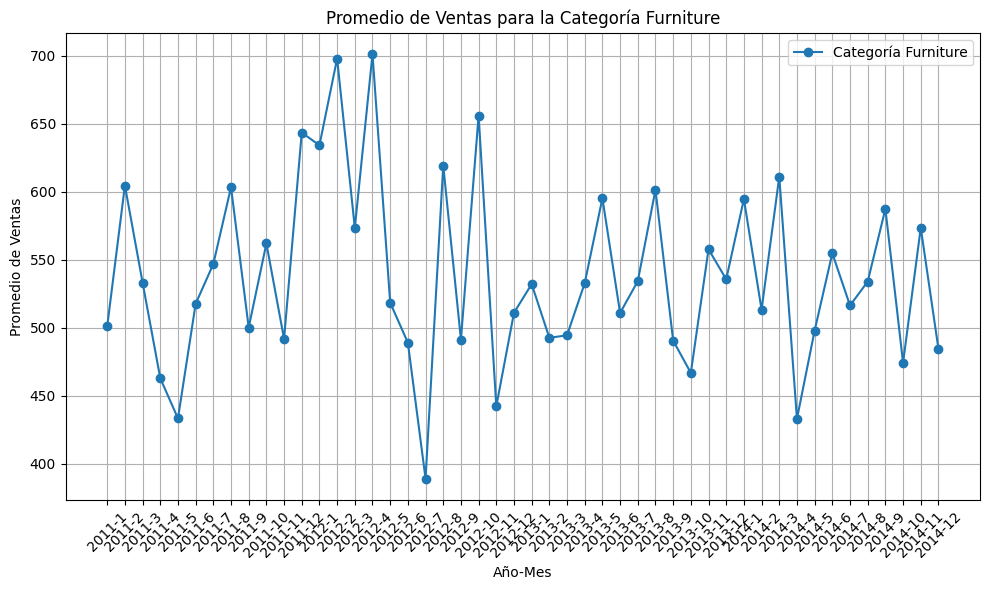

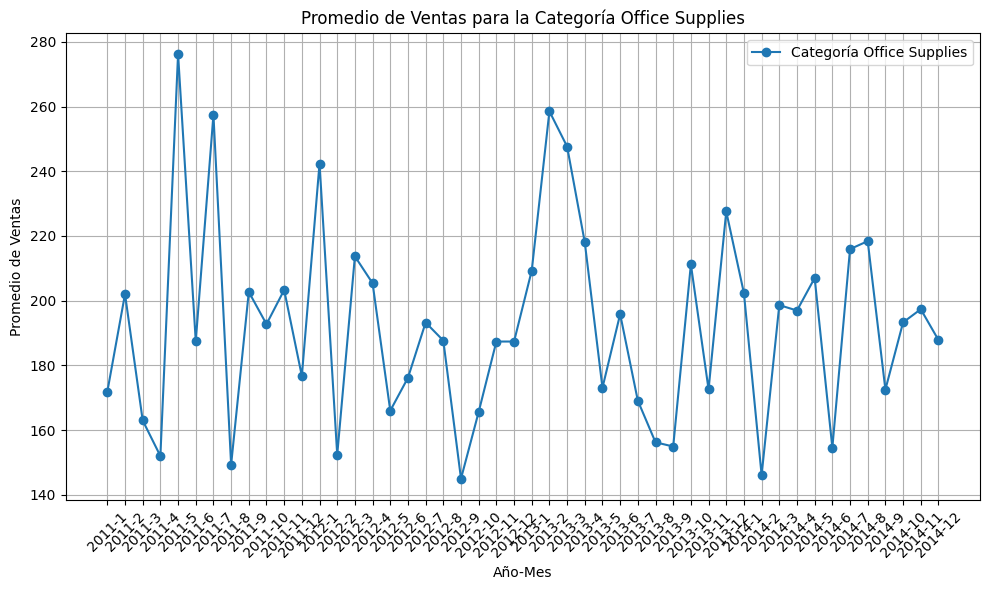

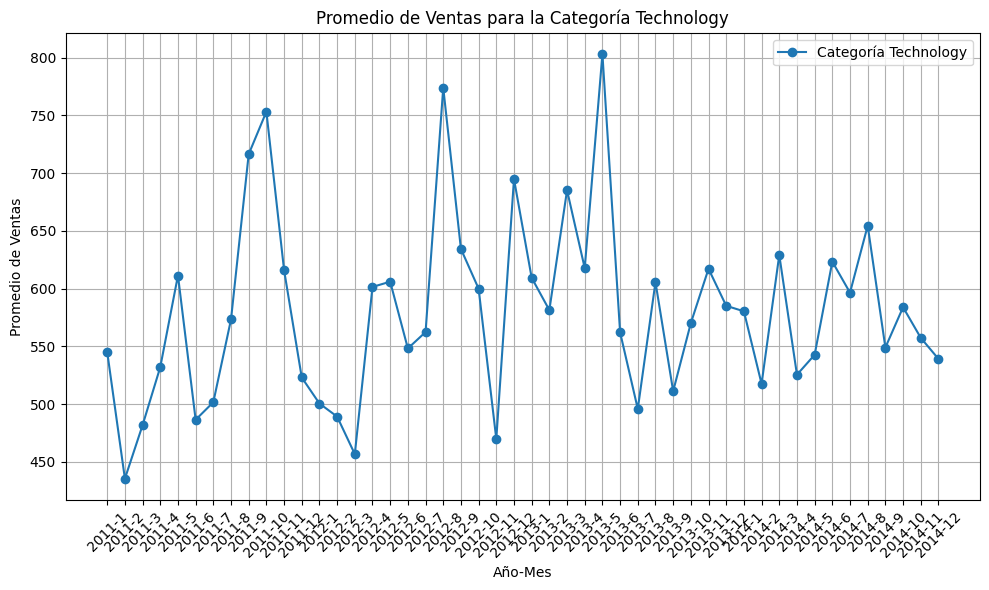

In [170]:
#Calculo el promedio de ventas, agrupado por 'Category', 'Month-Order' y 'Year-Order'
promedioventas = spst.groupby(['Category', 'Month-Order', 'Year-Order'])['Sales'].mean().reset_index()

#Converti 'Month-Order' y 'Year-Order' a formato 'str' y luego los combine en una nueva columna 'Year-Month'
promedioventas['Year-Month'] = promedioventas['Year-Order'].astype(str) + '-' + promedioventas['Month-Order'].astype(str)

#Ordene el DataFrame primero por 'Year-Order' y luego por 'Month-Order'
promedioventas = promedioventas.sort_values(['Year-Order', 'Month-Order'])

#Cree el grafico de lineas iterando por cada categoria
for categoria, datos in promedioventas.groupby('Category'):
    plt.figure(figsize=(10, 6))
    plt.plot(datos['Year-Month'], datos['Sales'], label=f'Categoría {categoria}', marker='o')
    plt.xlabel('Año-Mes')
    plt.ylabel('Promedio de Ventas')
    plt.title(f'Promedio de Ventas para la Categoría {categoria}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

**Conlusión:** Para la categoria 'Furniture' se puede observar que el promedio de ventas tiene picos abruptos de subida y bajada durante todos los año-mes por lo cual debe ser una alerta para la empresa ya que es la segunda categoria mas importante. Para la categoria 'Office Suplies' tambien tiene el mismo problema que  'Furniture' pero no es una categoria que puede afectar drasticamente el promedio de ventas porque los mayores promedios de ventas de esta categoria ni se acercan a los promedios minimos de las otras categorias. Y para la categoria 'Technology' es la unica categoria que se mantiene mas estable a traves del tiempo lo cual es un punto a favor porque siendo 'Technology' la mejor categoria de la empresa que representa nuestro mayor promedio de ventas

# Se va a hacer un promedio de ventas para cada categoria y comparar si el promedio de ventas es mayor en un dia laborable o en un dia no laborable

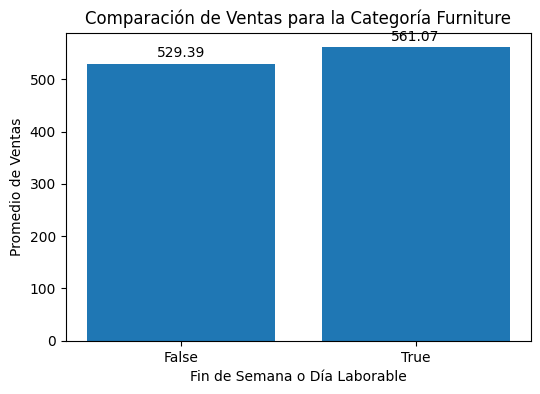

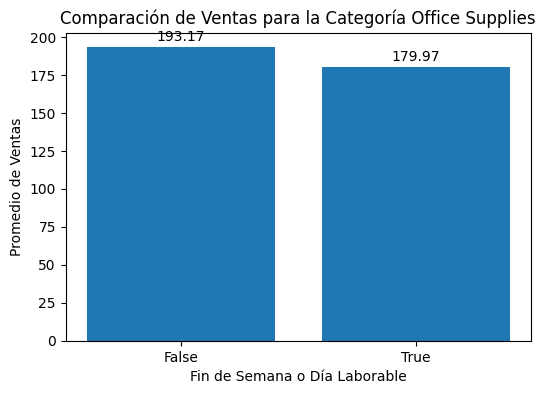

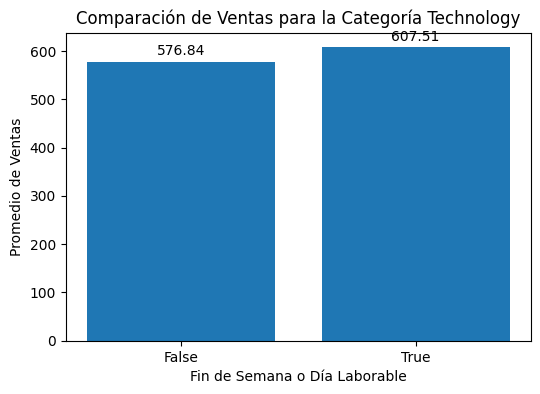

In [171]:
#spst['Order Date'] = pd.to_datetime(spst['Order Date'])

#Se crea la funcion lambda con la funcion weekday() para determinar si es un dia laborable o no
spst['EsFinDeSemana'] = spst['Order Date'].apply(lambda x: x.weekday() >= 5)

#Se calcula el promedio de 'Sales' para los fines de semana y días de semana, agrupados por 'Category'
promedio_ventas = spst.groupby(['Category', 'EsFinDeSemana'])['Sales'].mean().reset_index()

#Como se quiere un grafico de cada categoria se crea un bucle for para iterar por cada 'Category'
for categoria, datos_categoria in promedio_ventas.groupby('Category'):
    #El grafico a usar va a hacer grafico de barras
    fig, ax = plt.subplots(figsize=(6, 4))

    #Se agrega barras para fines de semana y días laborables
    ax.bar(datos_categoria['EsFinDeSemana'].astype(str), datos_categoria['Sales'])

     #Agregue las etiquetas de datos para cada columna
    for i, valor in enumerate(datos_categoria['Sales']):
        ax.annotate(f'{valor:.2f}', (i, valor), textcoords="offset points", xytext=(0,5), ha='center')
    ax.set_xlabel('Fin de Semana o Día Laborable')
    ax.set_ylabel('Promedio de Ventas')
    ax.set_title(f'Comparación de Ventas para la Categoría {categoria}')
    plt.show()

**Conclusión:** Se encontro que en los fines de semana hay un mayor promedio de ventas para las categoria 'Techonology' y 'Furniture' pero en 'Office Suplies' el promedio de ventas es menor siendo 'Office Suplies' la categoria de menor
ventas en dias laborables y no laborables. Esto nos muestra una correlacion con el analisis del mayor dia de ventas, en 'Technologhy' se encontro que el mejor dia de ventas es el domingo lo cual concuerda con la grafica actual teniendo como mayor promedio de ventas los dias no laborables